In [1]:
import pandas as pd
import matplotlib.pyplot as plt

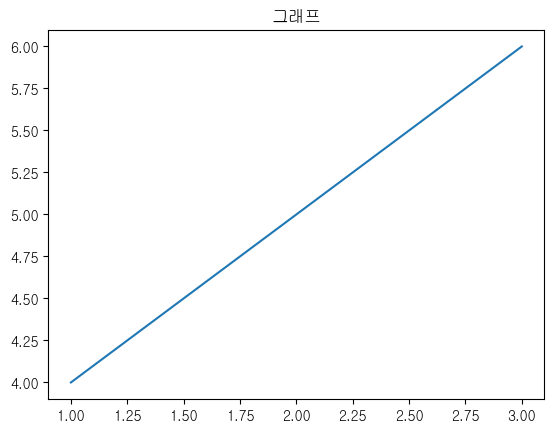

In [4]:
plt.plot([1,2,3],[4,5,6])
plt.title('그래프')
plt.show()

In [3]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리 가져온다.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'Gulim'

In [5]:
# 폰트 확인하기
[f.name for f in fm.fontManager.ttflist if 'Gulim' in f.name]

['New Gulim', 'Gulim']

* 데이터 수집<br>
https://data.seoul.go.kr/dataList/OA-20470/F/1/datasetView.do

# 데이터 불러오기

In [15]:
# df = pd.read_csv('data/서울시_자치구별_코로나 확진자, 사망자 현황(일자별).csv')
# 데이터 encoding이 안된 경우
# df = pd.read_csv('data/서울시_자치구별_코로나 확진자, 사망자 현황(일자별).csv',encoding='cp949')
df = pd.read_csv('data/서울시 만5세 이하 코로나19 확진자 현황(2021~2022년).csv')

In [16]:
df

,날짜,만5세 이하 코로나19 확진자 수(명)
0,2021-03-01,6
1,2021-03-02,7
2,2021-03-03,2
3,2021-03-04,1
4,2021-03-05,1
...,...,...
330,2022-01-27,115
331,2022-01-28,126
332,2022-01-29,144
333,2022-01-30,153


# 데이터 확인 및 전처리
## 컬럼별 데이터 확인

In [18]:
df['컬럼명'].unique()

## 불필요한 컬럼 삭제

In [19]:
df.drop(columns=['컬럼명리스트'],inplace=Ture)

## 자료형 변환

In [21]:
# 자료형 확인
df.dtypes

날짜                       object
만5세 이하 코로나19 확진자 수(명)     int64
dtype: object

In [26]:
# 날짜 -> datetime
df['날짜'] = pd.to_datetime(df['날짜'])

In [27]:
df.dtypes

날짜                       datetime64[ns]
만5세 이하 코로나19 확진자 수(명)             int64
dtype: object

In [23]:
# 역 컬럼의 value의 갯수
df['지역'].nunique()
# 지역 컬럼의 value 리스트
df['지역'].unique()

# 앞뒤 공백제거
df['지역']=df['지역'].str.strip()

,날짜,만5세 이하 코로나19 확진자 수(명)
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
330,False,False
331,False,False
332,False,False
333,False,False


In [ ]:
# 지역, 상태 -> category 형변환 
# 형변환된 카테고리형 데이터에 문자열함수 적용시, 다시 문자열 형으로 변환된다.
df['지역'] = df['지역'].astype('category')

In [ ]:
# 자료형 확인
df.dtypes

In [28]:
# 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   날짜                     335 non-null    datetime64[ns]
 1   만5세 이하 코로나19 확진자 수(명)  335 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.4 KB


## 결측치 분석

In [29]:
df.isnull().sum()

날짜                       0
만5세 이하 코로나19 확진자 수(명)    0
dtype: int64

# 구별 확진자 동향
## 확진일-구별 확진자수 집계
### 피봇테이블 만들기

In [32]:
df_gu = pd.pivot_table(df,index='확진일',columns='지역',values='연변',aggfunc='count',margins=True)
df_gu

### 서울시 일별 추가확진자 동향

In [ ]:
s_date = df_gu['All'][:-1]

In [35]:
# 서울시 일별 추가확진자가 많았던 순으로 보기
s_date.sort_values(ascending=False)

In [36]:
# 서울시 일별 추가확진자 시각화
x=s_date.index
y=s_date.values
plt.plot(x,y)
plt.title('서울시 일별 추가확진자(2021.09.28)')
plt.xlabel('확진일')
plt.ylabel('추가확진자수')
plt.xticks(rotation=45)
plt.show()

### 서울시 구별 누적확진자 비교

In [39]:
# 서울시 구별 추가확진자가 많았던 순으로 보기
s_gu = df_gu.loc['All'][:-1]
s_gu = s_gu.sort_values(ascending=False) : 내림차순 정렬 

In [43]:
# 서울시 구별 누적확진자 많은 순으로 시각화
x = s_gu.index
y = s_gu.values

plt.figure(ftgsize=(10,7)) 
# => 가로 10 세로 7로 label 사이즈 변경 반드시 그래프 그리기 전에 호출해야한다.

plt.bar(x,y) : 세로
plt.barh(x,y) : 가로

plt.title('서울시 구별 추가확진자(2021.09.28)')

### 최근일 기준 지역별 추가확진자

In [51]:
# s_gu = df_gu.iloc[-2][:-1] : 마지막 All 행 제거
# s_gu = s_gu.sort_values(ascending=False)

In [ ]:
x=s_gu.index
y=s_gu.values
plt.figure(ftgsize=(10,7))
plt.barh(x,y)
plt.show()

## 접촉력에 따른 확진 분석

### 접촉력에 따른 확진 건수 best10

In [ ]:
# 값이 몇개가 있는지 알고 싶으면 value_counts() => value가 높은 순으로 sort 됨
df['접촉력'].value_counts()[:10].to_frame()

### 최군월에 접촉력에 따른 확진 건수 best10
* 2021-09

In [ ]:
dt[(df['확진일'].dt.year == 2021) & (df['확진일'].dt.month == 9)]['접촉력'].value_counts()[:10].to_frame()